## Chi-Squared Analysis

### First Question: Did more women and children survive compared to men?

Dataset from Canvas (Titanic Passenger List.csv)

In [1]:
import pandas as pd

passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

passengers_df.head(20)

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
5,"CALDWELL, Master Alden Gates",1911.0,1992.0,0.833333,Male,2,lived,£29.00,29.00
6,"WEST, Miss Barbara Joyce",1911.0,2007.0,0.833333,Female,2,lived,£27 15s,27.75
7,"AKS, Master Philip",1911.0,1991.0,0.833333,Male,3,lived,£9 7s,9.35
8,"ALLISON, Master Hudson Trevor",1911.0,1929.0,0.916667,Male,1,lived,£151 16s,151.80
9,"NAKID, Miss Mariayam",1911.0,1912.0,1.000000,Female,3,lived,£15 14s 10d,15.74


In [2]:
passengers_df.tail(20)

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
1332,"EVANS, Miss",NaN,NaN,NaN,Female,2,died,£1.00,1.0
1333,"MULLEN,",NaN,NaN,NaN,Female,2,died,£1.00,1.0
1334,"DAVIES, Miss K.",NaN,NaN,NaN,Female,2,died,£2.00,2.0
1335,"DAVIES, Mr H. V.",NaN,NaN,NaN,Male,2,died,£2.00,2.0
1336,"KNEESE, Miss",NaN,NaN,NaN,Female,2,died,£2.00,2.0
1337,"OSBORNE, Miss D.",NaN,NaN,NaN,Female,2,died,£2.00,2.0
1338,"REMESCH, Miss",NaN,NaN,NaN,Female,2,died,£2.00,2.0
1339,"TOVEY, Miss",NaN,NaN,NaN,Female,2,died,£2.00,2.0
1340,"FORMAN, Mr J.",NaN,NaN,NaN,Male,1,died,£3.00,3.0
1341,"FORMAN, Mrs",NaN,NaN,NaN,Female,1,died,£3.00,3.0


- What kind of data is the `dependent` variable?
- What kind of data is the `independent` variable?
    - Nominal

Two Types:
    - `Ordinal` data. Data that can be ordered
    - `Categorical/nominal`. Data that can be ordered

In [3]:
# Margins = True will show the summary
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'], margins=True)
print(contingency_table)

Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


Text(0, 0.5, 'Count')

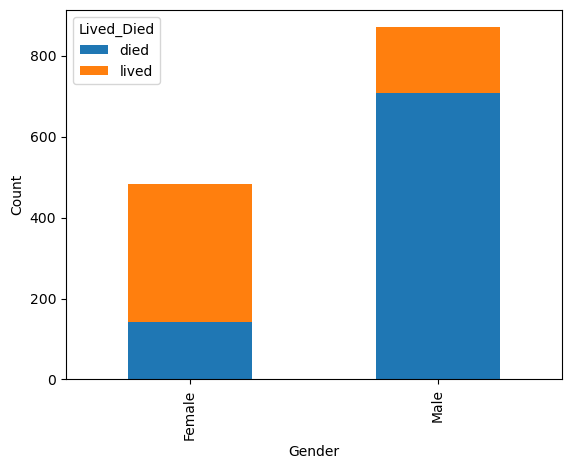

In [4]:
# Task: Create a stacked bar chart showing the number of passenger by gender that lived or died.

import matplotlib.pyplot as plt

#Exclude the last column and row (summary info)

# For plotting do not include margins=True
contingency_table = pd.crosstab(passengers_df['Gender'], passengers_df['Lived_Died'])
# contingency_table.iloc[:-1,:-1].plot(kind='bar', stacked=True)
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')

In [5]:
from scipy import stats # for chi_contingency

print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back
# 1) Chi_Squared: The higher the chi_squared statistics, the less likelihood that the observed values were the result of pure chance 
# 2) Target P-Value
# 3) Degrees of freedom: 1 degree of freedom. (rows -1) * (r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square Example: Was Age Relevant?

In [6]:
# Check the age column. It is already fixed for the age at the time of the incident

# What about null values?

# Create the bins
#passengers_df['age_bins'] = pd.cut(x=passengers_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])


passengers_df['age_bins'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10))

contingency_table = pd.crosstab(passengers_df['age_bins'], passengers_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

#contingency_table.plot(kind='hist')


Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


In [7]:
passengers_df.groupby(['age_bins'], ['Lived_Died']).size().unstack().plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Ranges')
plt.title('Histogram of Age Ranges')

TypeError: unhashable type: 'list'

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

passengers_df
# Create a heatmap
passengers_df['age_bins'] = pd.cut(x=passengers_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

# Use a pivottable

## EKSIK

In [ ]:
# Drop columns that are not needed
passengers_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_class'], axis=1, inplace=True)
passengers_df.dropna(inplace=True) # drop null values

#Encode the categorical data
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] =le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Groups'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10)) # create bins
pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups']) # Use a pivottable
pivot_table.applymap(lambda)

##EKSIK

## Task: Did the Titanic Passenger Class Affected Survivorship
In this case, the data is `ordinal` because we can order the categories from first to third

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

passengers_df.head()

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(passengers_df['Passenger_Class'], passengers_df['Lived_Died'], margins=True)
contingency_table

In [ ]:
# Create a Bar Plot with the data stacked
contingency_table = pd.crosstab(passengers_df['Lived_Died'],passengers_df['Passengers_Class'], margins=False)
contingency_table.plot(kind='bar', stacked=True)

In [ ]:
# Run a chi2_contingency on the table
contingency_table = pd.crosstab(passengers_df['Passenger_Class'], passengers_df['Lived_Died'], margins=False)
stats.chi2_contingency(contingency_table)[0:3]



Which passenger class is responsible for the significant difference in survival rate?
- Chi-square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent
- Since this is our first test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test


### Post-Hoc Test (Fisher's Exact Test)
- Compared every passenger class to every other class to see if there is a statistical significance between the two.
- We could apply a `Chi-Square` test for each of the three separate comparison, but our sample data is too small.
- In this case, `Fisher's Exact` test is a better option.

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')
contingency_table = pd.crosstab(passengers_df['Passengers_Class'], passengers_df['Lived_Died'],margins=False)
contingency_table

In [ ]:
first_class = contingency_table.iloc[0]. values # extract row values
second_class = contingency_table.iloc[1]. values # extract row values
third_class = contingency_table.iloc[2]. values # extract row values
# Create a Fisher's Exact test to determine if there is a relationship between passenger classes and survival
oddsratio, pvalue = stats.fisher_exact([first_class], [second_class])
print(f'Fishers Exact Test for First and Second class: {pvalue}')
oddsratio, pvalue = stats.fisher_exact([first_class], [third_class])
print(f'Fishers Exact Test for First and Third class: {pvalue}')
oddsratio, pvalue = stats.fisher_exact([second_class], [third_class])
print(f'Fishers Exact Test for Second and Third class: {pvalue}')

Each of the Fisher's Test reveals statistical significance

Another way to conceptualize the result is to look at the percentages:

| Passenger Class | Died |
|-----------------|------|
| First Class     | 43%  |
| Second Class    | 60%  |
| Third Class     | 74%  |

TODO: Create a heatmap of Passenger Class split in Age_Ranges by Gender and Survival rate

In [ ]:
# Drop columns that are not needed
passengers_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_class'], axis=1, inplace=True)
passengers_df.dropna(inplace=True) # drop null values

#Encode the categorical data
le = preprocessing.LabelEncoder()
passengers_df['Lived_Died_int'] =le.fit_transform(passengers_df['Lived_Died'])
passengers_df['Age_Groups'] = pd.cut(x=passengers_df['Age'], bins=range(0,90,10)) # create bins
pivot_table = pd.pivot_table(passengers_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups']) # Use a pivottable
pivot_table.applymap(lambda x: 1 - x) # invert values in heatmap

# Create a heatmap
plt.figure(figsize=(16,5))
x_axis_labels = [

]
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=)


## EKSIK


### T-Test: Fare and Gender

While `Chi-Test` and `Fisher-Test` focus on `categorical` discrete dependent variable, the `T-Test` and `ANOVA` test, target `continuous` data

#### How was fare (price of passenger) Affected by Gender and Passenger Class?
- Did one gender pay more than the other?
- Is there a difference in fare between passenger class?
- Is there an interaction between gender and passenger class on the resulting fare?

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

# Load data
passengers_df = pd.read_csv('../data/Titanic_Passengers.csv')

In [ ]:
# Visualize data using boxplot
sns.boxplot(y = passengers_df['Fare decimal'], x=passengers_df['Gender'])
plt.ylabel('Fare Amount in Pounds')

# EKSIK


In [ ]:
male = passengers_df[passengers_df['Gender'] == 'Male']
print = (f'Male Summary {male['Fare_decimal'].describe()}')

In [ ]:
female = passengers_df[passengers_df['Gender'] == 'Female']
print = (f'Female Summary {female['Fare_decimal'].describe()}')

In [ ]:
from scipy.stats import ttest_ind
# Drop null values
passengers_df.dropna(inplace=True)
male = passengers_df[passengers_df['Gender'] == 'Male']
female = passengers_df[passengers_df['Gender'] == 'Female']

#Run test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-test for Fare Paid p_value {pvalue}')
